


We build a classifier based on CNN to recognize hand-written digits 0-9. We are using the mnist (Modified National Institute of Standards and Technology) dataset, which can be loaded: (train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data() It contains black-white images (28 x 28 pixels) and their labels of hand-written digit (60000 in training set and 10000 in test set).

1. Plot first 9 images: Use plt.title() to display the labels with the format “Digit: 5” for example. You may want to use plt.tight_layout() to avoid overlaps.

2. Prepare the data by: train_digits = train_digits.reshape(60000,28,28,1) train_labels = tf.keras.utils.to_categorical(train_labels, 10) Do the same for test set.

3. Build your CNN model with Conv2D with (3, 3) filters and MaxPooling2D((2, 2)). Show the summary of your model.

4. Compile and train your model. Consider the choices of optimizer, loss, and epochs. What are your accuracy and val_accuracy?

5. Plot the history of model training against epoch.

6. Evaluate the model with the test data.


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt

In [2]:
(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


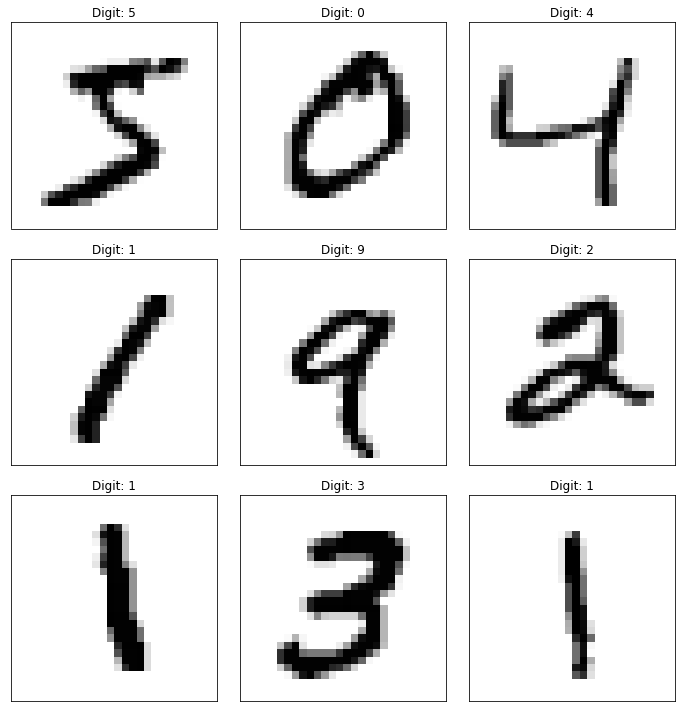

In [3]:
#1
train_digits, test_digits = train_digits / 255.0, test_digits / 255.0 

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_digits[i], cmap=plt.cm.binary)
    plt.title('Digit: {}'.format(train_labels[i]))
    plt.tight_layout()
plt.show() 

In [4]:
#2
train_digits = train_digits.reshape(60000,28,28,1) 
train_labels = tf.keras.utils.to_categorical(train_labels, 10) 

test_digits = test_digits.reshape(10000,28,28,1) 
test_labels = tf.keras.utils.to_categorical(test_labels, 10) 

In [5]:
import numpy as np
rand=np.arange(60000)
np.random.shuffle(rand)
train_no=rand[:50000]

val_no=np.setdiff1d(rand,train_no)

training_digits,validation_digits= train_digits[train_no,:,:],train_digits[val_no,:,:]
training_labels,validation_labels =train_labels[train_no],train_labels[val_no]

In [6]:
#3
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.Flatten())
model.add(layers.Dense(500, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               2

In [7]:
#4
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_digits, training_labels, epochs=10, 
                    validation_data=(validation_digits, validation_labels)) 

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.3241 - accuracy: 0.8938 - val_loss: 0.0556 - val_accuracy: 0.9843
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0465 - accuracy: 0.9849 - val_loss: 0.0491 - val_accuracy: 0.9873
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0472 - val_accuracy: 0.9860
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0461 - val_accuracy: 0.9860
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0605 - val_accuracy: 0.9847
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0179 - accuracy: 0.9946 - val_loss: 0.0662 - val_accuracy: 0.9863
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0507 -

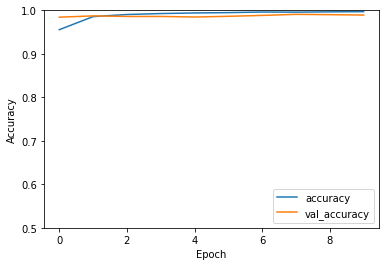

In [8]:
#5
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [10]:
#6
test_loss, test_acc = model.evaluate(test_digits,  test_labels, verbose=2) 

print(test_acc) 

313/313 - 2s - loss: 0.0439 - accuracy: 0.9901
0.9901000261306763
